# Project B

### Expectation - Maximization algorithm for image segmentation

In [1]:
import numpy as np
import pandas as pd
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data():

    img = imread('im.jpg')
    return img

In [3]:
image_data = load_data()

In [4]:
print (image_data.shape)

(690, 550, 3)


In [5]:
image_data = np.reshape(image_data,(image_data.shape[0]*image_data.shape[1],image_data.shape[2]))

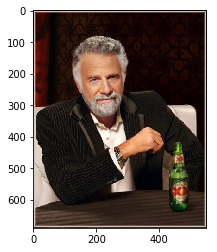

In [6]:
plt.imshow( image_data.reshape(690,550,3) ) 
plt.show()

In [7]:
image_data = image_data.astype(float)/255

### Parameters Initialization

In [29]:
N, D = image_data.shape
K = 32

Pinit = np.full((K, 1), 1/K)
Minit = (np.array( [np.mean(image_data, axis=0),]*K ) + np.random.randn( K, D ))%1
Sinit = np.array (np.random.randn( K, 1 )%1)

In [10]:
def numerator(P,M,S,k_num):
    
    
    tmp = np.zeros((N,1))
    
    for n in range (N):     
        
        a = -1/(2*S[k_num,0])
        b = (2*P[k_num,0]*S[k_num,0])**0.5
        x = np.sum((np.subtract(image_data[n,:],M[k_num,:]))**2)
        gauss = np.exp(a*x)/(b**3)
        tmp[n,0] = P[k_num,0]*gauss

    return tmp

### Expectation

In [11]:
def expectation(P,M,S):
    
    gamma = np.zeros((N,K))
    
    
    for k in range(K):
        tmp = numerator (P, M, S, k)
        gamma[:,k] = tmp[:,0]

    L = 0
    
    for n in range(N):
        
        g_sum = np.sum(gamma[n,:])
        L += np.log(g_sum)
        
        for k in range(K):
            gamma[n,k] /= g_sum
            
    return gamma,L

### New μ

In [12]:
def M_new(gamma):
    
    M = np.zeros((K,D))
    
    for k in range (K):
        
        sum1 = 0
        sum2 = np.sum(gamma[:,k])
        
        for d in range(D):    
                
            sum1 = np.sum(np.multiply(gamma[:,k],image_data[:,d]))                            
            M[k,d] = sum1/sum2
        
    return M

### New Σ

In [13]:
def S_new(gamma, M):
    
    
    S = np.zeros((K,1))
    
    for k in range (K):
        
        sum1 = 0
        
        for n in range (N):
            
            sum1 += gamma[n,k]*(np.sum((np.subtract(image_data[n,:],M[k,:]))**2))             

        S[k,0] = sum1/(D*np.sum(gamma[:,k]))
        
    return S

### New π

In [14]:
def P_new(gamma):
    
    P = np.zeros((K,1))
    
    for k in range (K):
           
        P[k,0] = np.sum(gamma[:,k])/N                             
        
    return P

In [15]:
def plot_costs(costs):
    x = range( 1, len(costs)+1 )
    y = costs
    plt.plot( x, y )
    plt.ylabel( 'cost' )
    plt.xlabel( 'iterations' )
    plt.title( "Cost Function =" )
    plt.xticks( x )
    plt.show()

## Expectation - Maximization

In [18]:
def em(Pinit, Minit, Sinit):
    
    P = Pinit
    M = Minit
    S = Sinit
    
    tol = 1e-6 #tolerance of convergence
    Jold = np.NINF
    maxIters = 10 #number of iterations
    costs = []
    
    for it in range(maxIters):
        
        J = 0 #total cost
    
        #step1
        gamma,L = expectation(P,M,S)
        J += L
        
        #print (pd.DataFrame(gamma))
        
        #step2
        M = M_new(gamma)
        S = S_new(gamma,M)
        P = P_new(gamma)

        #print (P)
        #print (M)
        #print (S)
        
        for n in range(N):
            image_supr[n,:] = M[np.argmax(gamma[n,:]),:]
    
        plt.imshow( image_supr.reshape(690,550,3) ) 
        plt.show()
        
        # Step 3 -- Check for convergence
        costs.append(J)
        print("Iteration #{}, Cost function value: {}".format(it+1, J))
        if np.abs(J - Jold) < tol:
            break
        Jold = J
    
    
    plot_costs(costs)
    
    return P,M,S

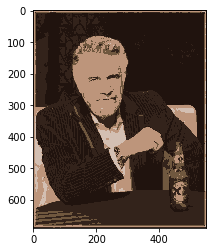

Iteration #1, Cost function value: 1770756.3714691924


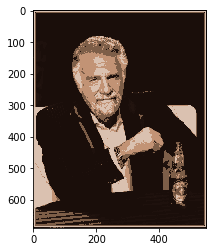

Iteration #2, Cost function value: 3161175.004696848


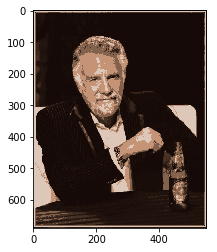

Iteration #3, Cost function value: 3677751.764579993


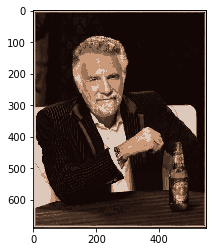

Iteration #4, Cost function value: 3904799.4402504284


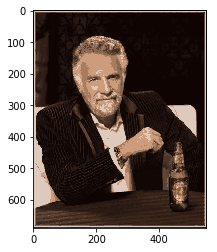

Iteration #5, Cost function value: 4046881.5720077697


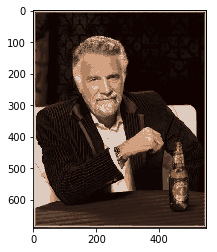

Iteration #6, Cost function value: 4150352.7859176686


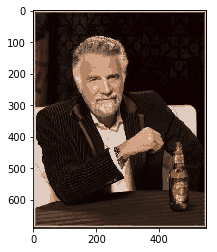

Iteration #7, Cost function value: 4216048.726319628


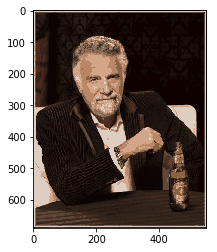

Iteration #8, Cost function value: 4262359.25790575


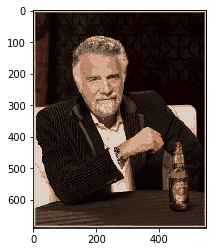

Iteration #9, Cost function value: 4306036.179079045


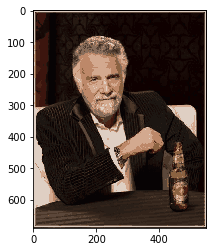

Iteration #10, Cost function value: 4354047.040202941


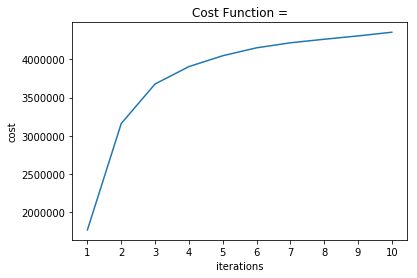

In [31]:
image_supr = np.zeros((N,D))
P,M,S = em (Pinit, Minit, Sinit)

In [32]:
plt.imsave('test.jpg', image_supr.reshape(690,550,3))

## Error

In [33]:
error = (1/N)*np.sum((image_data-image_supr)**2)
print (error)

0.004166839506827377


In [34]:
output = set()
for i in range(N):
    output.add(image_supr[i,0])
        
print(len(output))      

32
